Importing required modules

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('fivethirtyeight')

Read the pickled dataframe

In [2]:
df = pd.read_pickle('./WC2018_preprocessed.pkl')
df.head()

,shot_x,shot_y,shot_distance,shot_a,shot_b,shot_angle,timestamp,outcome_name,outcome_id,body_part_name,...,pack_density,shot_player,home_or_away,key_pass_type,key_pass_pattern,isCross,isCutback,preceding_event_player,preceding_event_team,statsbomb_xg
0,97.0,53.0,26.4,28.600699,24.698178,15.1,2020-04-18 00:04:17.267,Off T,98,Right Foot,...,2,Mile Jedinak,home,None,None,False,False,Mile Jedinak,Australia,0.032260
1,95.0,46.0,25.7,26.925824,25.079872,17.2,2020-04-18 00:11:27.587,Blocked,96,Left Foot,...,3,Tom RogiÄ‡,home,Ground Pass,From Throw In,False,False,Tom RogiÄ‡,Australia,0.049563
2,104.0,53.0,20.6,23.345235,18.357560,17.4,2020-04-18 00:17:14.547,Goal,97,Right Foot,...,2,AndrÃ© MartÃ­n Carrillo DÃ­az,away,High Pass,Regular Play,False,False,AndrÃ© MartÃ­n Carrillo DÃ­az,Peru,0.035208
3,112.0,42.0,8.2,10.000000,8.246211,50.9,2020-04-18 00:20:00.707,Wayward,101,Head,...,2,Mathew Leckie,home,High Pass,From Throw In,True,False,Mathew Leckie,Australia,0.129688
4,109.0,37.0,11.4,11.045361,13.038405,37.7,2020-04-18 00:24:07.787,Saved,100,Head,...,1,JosÃ© Paolo Guerrero GonzÃ¡lez,away,High Pass,From Free Kick,False,False,JosÃ© Paolo Guerrero GonzÃ¡lez,Peru,0.036955


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1693 entries, 0 to 1705
Data columns (total 27 columns):
shot_x                    1693 non-null float64
shot_y                    1693 non-null float64
shot_distance             1693 non-null float64
shot_a                    1693 non-null float64
shot_b                    1693 non-null float64
shot_angle                1693 non-null float64
timestamp                 1693 non-null datetime64[ns]
outcome_name              1693 non-null object
outcome_id                1693 non-null int64
body_part_name            1693 non-null object
body_part_id              1693 non-null int64
technique_name            1693 non-null object
technique_id              1693 non-null int64
type_name                 1693 non-null object
type_id                   1693 non-null int64
first_time                1693 non-null bool
preceding_event           1693 non-null object
pack_density              1693 non-null int64
shot_player               1693 non-null 

In [4]:
df.describe()

,shot_x,shot_y,shot_distance,shot_a,shot_b,shot_angle,outcome_id,body_part_id,technique_id,type_id,pack_density,statsbomb_xg
count,1693.000000,1693.000000,1693.000000,1693.000000,1693.000000,1693.00000,1693.000000,1693.000000,1693.000000,1693.000000,1693.000000,1693.000000
mean,103.988777,40.196692,18.991849,19.425723,19.353092,25.81583,97.991731,39.110455,92.964560,85.856468,1.943887,0.107934
std,8.723246,10.262843,8.773455,8.830211,8.811464,16.95245,1.634419,3.079171,0.830091,5.317914,1.308200,0.168671
min,59.000000,13.000000,1.400000,1.000000,1.414214,2.40000,96.000000,37.000000,89.000000,62.000000,0.000000,0.006575
25%,97.000000,33.000000,11.700000,12.083046,12.000000,14.50000,96.000000,38.000000,93.000000,87.000000,1.000000,0.024862
50%,105.000000,40.000000,18.000000,18.601075,18.601075,19.50000,98.000000,40.000000,93.000000,87.000000,2.000000,0.045896
75%,111.000000,48.000000,25.500000,26.172505,25.806976,33.70000,100.000000,40.000000,93.000000,87.000000,2.000000,0.103757
max,119.000000,69.000000,61.500000,61.131007,62.169124,150.30000,101.000000,70.000000,95.000000,88.000000,10.000000,0.948846


Plotting all the shot locations on the pitch. The following code is used to create a football pitch.

In [9]:
from matplotlib.patches import Arc

# plotting shots on to a pitch

def pitch_creator(size=(10,6)):
    with plt.style.context('bmh'):
        fig = plt.figure(figsize=size)
        plt.axis([60, 125, -10, 90])
        plt.grid(False)


        plt.plot([60, 60], [0, 80], color='black')
        plt.plot([120, 120], [0, 80], color="black")
        plt.plot([60, 120], [0, 0], color='black')
        plt.plot([60, 120], [80, 80], color='black')

        centreCircle = plt.Circle((60, 40), 10, color='black', fill=False)

        # right penalty area
        plt.plot([120, 102], [18, 18], color='black')
        plt.plot([102, 102], [18, 62], color='black')
        plt.plot([102, 120], [62, 62], color='black')

        # right six yard box
        plt.plot([120, 114], [30, 30], color='black')
        plt.plot([114, 114], [30, 50], color='black')
        plt.plot([114, 120], [50, 50], color='black')


        # right goal posts
        plt.plot([120, 122], [36, 36], color='black')
        plt.plot([120, 122], [44, 44], color='black')
        plt.plot([122, 122], [36, 44], color='black')


        # right Arc
        rightArc = Arc((108, 40), height=18.3, width=18.3, angle=0,
                       theta1=130, theta2=230, color='red')

        ax = plt.gca()
        ax.add_patch(centreCircle)
        ax.add_patch(rightArc)
        ax.set_ylim(ax.get_ylim()[::-1])
        return fig

def plotter(fig,loc_list,color,label):
    
    loc_x=[]
    loc_y=[]
    for loc in loc_list:
        loc_x.append(loc[0])
        loc_y.append(loc[1])
            
    plt.scatter(loc_x,loc_y,c=color,alpha='0.6',label=label,edgecolor='black',linewidth=0.4)
    plt.axis('off')
    
    
    return fig

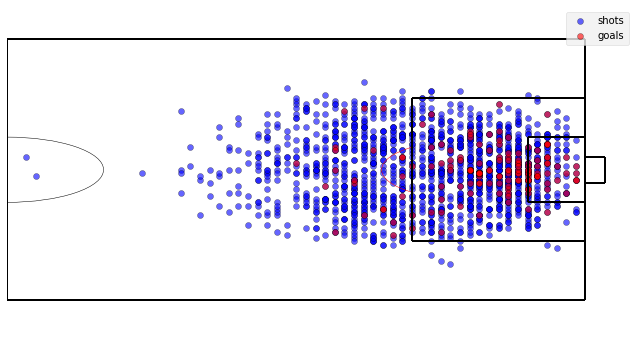

In [10]:
#plotting all data
plt1 = pitch_creator()
plt1 = plotter(plt,df[['shot_x','shot_y']].values,'blue','shots')
plt1 = plotter(plt,df[df['outcome_name']=='Goal'][['shot_x','shot_y']].values,'red','goals')
plt.legend(loc='upper right')
# plt.show()
plt.savefig('overallpitchmap.png')

From the above plot we observe that the goals are scored from shots that are taken closer to the goal. To make it easier to identify goals from shots, we add two more columns to the dataframe, i.e. 'isGoal' and 'isGoalBool'

In [11]:
isGoal=[]
isGoalBool = []
for outcome in df['outcome_name'].values:
    if outcome=='Goal':
        isGoal.append('Goal')
        isGoalBool.append(True)
    else:
        isGoal.append('Not Goal')
        isGoalBool.append(False)

In [12]:
df['isGoal']=isGoal
df['isGoalBool']=isGoalBool

**Exploration based on the hypothesis tree**

**Looking at the open play shots**

In [13]:
#isolation open play shots
df_open_play = df[df['type_name']=='Open Play']
df_open_play.head()

,shot_x,shot_y,shot_distance,shot_a,shot_b,shot_angle,timestamp,outcome_name,outcome_id,body_part_name,...,home_or_away,key_pass_type,key_pass_pattern,isCross,isCutback,preceding_event_player,preceding_event_team,statsbomb_xg,isGoal,isGoalBool
0,97.0,53.0,26.4,28.600699,24.698178,15.1,2020-04-18 00:04:17.267,Off T,98,Right Foot,...,home,None,None,False,False,Mile Jedinak,Australia,0.032260,Not Goal,False
1,95.0,46.0,25.7,26.925824,25.079872,17.2,2020-04-18 00:11:27.587,Blocked,96,Left Foot,...,home,Ground Pass,From Throw In,False,False,Tom RogiÄ‡,Australia,0.049563,Not Goal,False
2,104.0,53.0,20.6,23.345235,18.357560,17.4,2020-04-18 00:17:14.547,Goal,97,Right Foot,...,away,High Pass,Regular Play,False,False,AndrÃ© MartÃ­n Carrillo DÃ­az,Peru,0.035208,Goal,True
3,112.0,42.0,8.2,10.000000,8.246211,50.9,2020-04-18 00:20:00.707,Wayward,101,Head,...,home,High Pass,From Throw In,True,False,Mathew Leckie,Australia,0.129688,Not Goal,False
4,109.0,37.0,11.4,11.045361,13.038405,37.7,2020-04-18 00:24:07.787,Saved,100,Head,...,away,High Pass,From Free Kick,False,False,JosÃ© Paolo Guerrero GonzÃ¡lez,Peru,0.036955,Not Goal,False


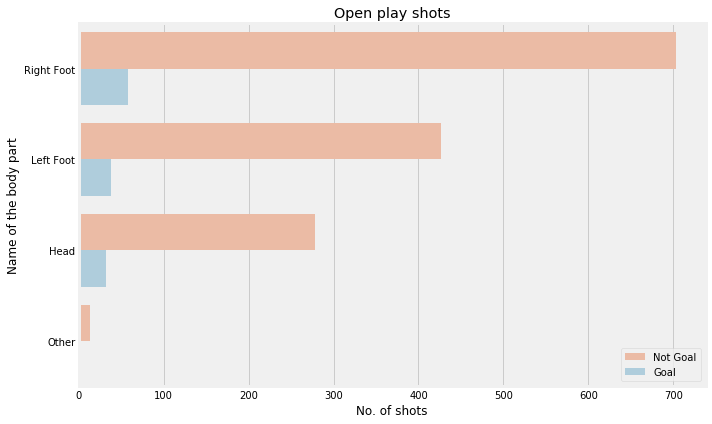

In [21]:
plt.figure(figsize=(10,6))
ax=sns.countplot(y='body_part_name',order=['Right Foot','Left Foot','Head','Other'],hue='isGoal',data=df_open_play, palette = 'RdBu');
ax.set(xlabel='No. of shots', ylabel='Name of the body part')
plt.title('Open play shots')
plt.legend(loc='lower right');
plt.tight_layout()
plt.savefig('body_part_feature.png')

The plot above shows that the amount of footed shots and goals are much higher than headed shots and goals. Let us examine this closer:

In [22]:
#isolating footed and headed shots and goals

filt1 = (df_open_play['body_part_name']=='Right Foot') | (df_open_play['body_part_name']=='Left Foot')
#calculating number of shots
footed_shots_count = df_open_play[filt1].shape[0] 

#isolating footed goals
footed_goals_count = sum(df_open_play[filt1]['isGoalBool'])

#isolating headed shots
filt2 = (df_open_play['body_part_name']=='Head')
headed_shots_count = df_open_play[filt2].shape[0]

#isolating headed goals
headed_goals_count = sum(df_open_play[filt2]['isGoalBool'])

footed_pct = footed_goals_count/footed_shots_count
headed_pct = headed_goals_count/headed_shots_count

print('The percentage of footed shots that result in goals is {0}'.format(round(footed_pct,2)*100))
print('The percentage of headed shots that result in goals is {0}'.format(round(headed_pct,2)*100))

The percentage of footed shots that result in goals is 8.0
The percentage of headed shots that result in goals is 10.0


This is an interesting stat compared to the plot we observed above. I honestly expected the percentage of headed shots conversions to be lesser. Usually, headers are taken from a distance closer to the goal. Let us see if out data verifies this fact.

C:\Users\anike\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\anike\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


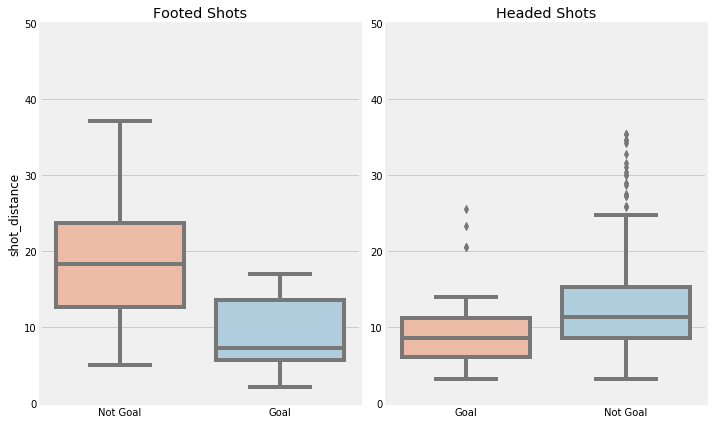

In [63]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(121)
ax2=fig.add_subplot(122)
sns.boxplot(x='isGoal',y='shot_distance',data=df_open_play[filt1],ax=ax1, palette = 'RdBu')
sns.boxplot(x='isGoal',y='shot_distance',data=df_open_play[filt2],ax=ax2, palette = 'RdBu')
ax1.set(ylim=(0,50));
ax2.set(ylim=(0,50));
ax2.set_ylabel('');
ax1.set_xlabel('');
ax2.set_xlabel('');
# fig.set_ylabel('Distance from which shot was taken')
plt.title('Box Plot of Headed and Footed shots')
ax1.set_title('Footed Shots');
ax2.set_title('Headed Shots');
plt.tight_layout()
plt.savefig('headed_vs_footed_distance.png')

The above box plots show that more footed shots are take from distances farther than the goal. Headed shots on the other hand are taken within the penalty box. This kind of biases the percentage comparision between the shots in the favor of headed shots. To carry out a fair comparision, only headed and footed shots within the penalty area(within 18 yard from the goal) must be compared.

In [27]:
#filtering out footed shots taken a distance less than 18 yards
filt3 = df_open_play[filt1]['shot_distance']<18
footed_pb_shots_count = df_open_play[filt1][filt3].shape[0]
footed_pb_goals_count = sum(df_open_play[filt1][filt3]['isGoalBool'])

footed_pb_pct = footed_pb_goals_count*100/footed_pb_shots_count

#filtering out headed shots taken a distance less than 18 yards
filt4 = df_open_play[filt2]['shot_distance']<18
headed_pb_shots_count = df_open_play[filt2][filt4].shape[0]
headed_pb_goals_count = sum(df_open_play[filt2][filt4]['isGoalBool'])


headed_pb_pct = headed_pb_goals_count*100/headed_pb_shots_count

print('The goal percentage of footed shots at a distance less than 18 yards is {0}'.format(round(footed_pb_pct,1)))
print('The goal percentage of headed shots at a distance less than 18 yards is {0}'.format(round(headed_pb_pct,1)))

The goal percentage of footed shots at a distance less than 18 yards is 15.8
The goal percentage of headed shots at a distance less than 18 yards is 10.6


On a fair comparision between the headed and footed shots, we see that the footed shots are more effective than the footed shots when taken from withing the penalty box.
Let us also look at the non open play headed and footed shots:

In [28]:
filt=df['type_name']=='Open Play'
df_not_open_play = df[~filt]

In [29]:
filt1 = (df_not_open_play['body_part_name']=='Right Foot') | (df_not_open_play['body_part_name']=='Left Foot')
filt2 = (df_not_open_play['body_part_name']=='Head')
filt3 = df_not_open_play[filt1]['shot_distance']<18
filt4 = df_not_open_play[filt2]['shot_distance']<18


footed_pb_shots_count = df_not_open_play[filt1][filt3].shape[0]
footed_pb_goals_count = sum(df_not_open_play[filt1][filt3]['isGoalBool'])

footed_pb_pct = footed_pb_goals_count*100/footed_pb_shots_count

headed_pb_shots_count = df_not_open_play[filt2][filt4].shape[0]
headed_pb_goals_count = sum(df_not_open_play[filt2][filt4]['isGoalBool'])

headed_pb_pct = headed_pb_goals_count*100/headed_pb_shots_count

print('The goal percentage of footed shots from non open play at a distance less than 18 yards is {0}'.format(round(footed_pb_pct,1)))
print('The goal percentage of headed shots from non open play at a distance less than 18 yards is {0}'.format(round(headed_pb_pct,1)))

ZeroDivisionError: division by zero

The zero division error occurs when trying to calculate the headed_pb_pct. This is because any headed shot taken during a part of the freekick or corner routine in the data set is considered as open play since one cannot directly head a ball during a freekick. It needs to have a preceeding pass. The freekick itself cannot be a header.

**Exploring preceding passes and pass play pattern**

As we know from the preprocessing phase, not all shots have preceding pass.

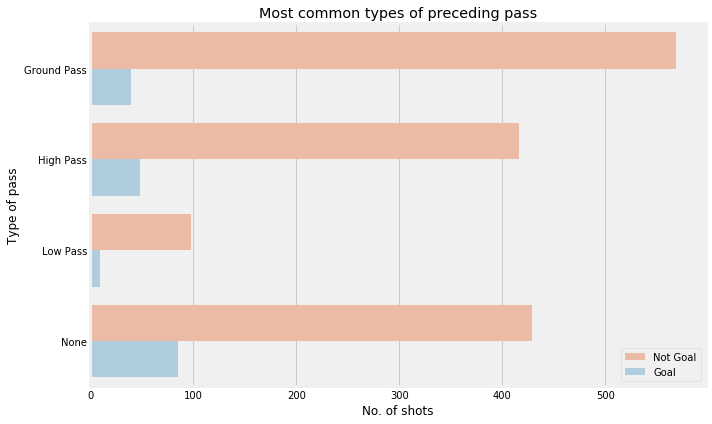

In [34]:
plt.figure(figsize=(10,6))
ax=sns.countplot(y='key_pass_type', order=['Ground Pass','High Pass','Low Pass','None'], hue='isGoal',data=df, palette = 'RdBu');
plt.legend(loc='lower right');
ax.set(xlabel='No. of shots', ylabel='Type of pass')
plt.title('Most common types of preceding pass')
plt.tight_layout()
plt.savefig('key_pass_type.png')

Most of the shots have a preceding pass in the dataset. 'Ground Pass' is the most common type followed by 'High Pass' and 'Low Pass'.
Definitions of passes according to Statsbomb:

'Low Pass' - is a pass below the shoulder level at peak height.

'High Pass' - is a pass above the shoulder level 

'Ground Pass' -  is a pass where ball comes off the ground.

Now, let us check if height of pass affects the chances of shot becoming a goal. Looking at the shot conversions following key passes:

In [35]:
def quant_pct(df,column,value):
    filt1 = df[column]==value
    df_filt = df[filt1]
    value_count = df_filt.shape[0]
    goal_count = sum(df_filt['isGoalBool'])
    value_pct = goal_count/value_count
    return value_pct

low_pass_pct = quant_pct(df,'key_pass_type','Low Pass')
high_pass_pct = quant_pct(df,'key_pass_type','High Pass')
ground_pass_pct = quant_pct(df,'key_pass_type','Ground Pass')

print('The percentage of shots from low passes which are goals is {0}'.format(round(low_pass_pct,2)*100))
print('The percentage of shots from high passes which are goals is {0}'.format(round(high_pass_pct,2)*100))
print('The percentage of shots from ground passes which are goals is {0}'.format(round(ground_pass_pct,2)*100))

The percentage of shots from low passes which are goals is 8.0
The percentage of shots from high passes which are goals is 10.0
The percentage of shots from ground passes which are goals is 6.0


The least number of goals result from low passes, but goal percentage is better than that of ground passes. Let us examine this in depth. 

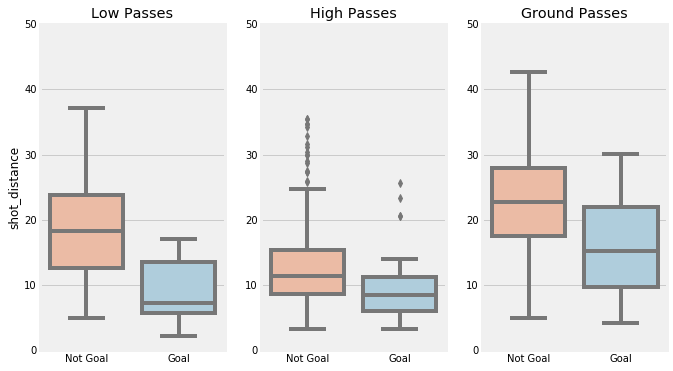

In [36]:
filt1 = df['key_pass_type']=='Low Pass'
filt2 = df['key_pass_type']=='High Pass'
filt3 = df['key_pass_type']=='Ground Pass'
low_pass = df[filt1]
high_pass = df[filt2]
ground_pass = df[filt3]

low_pass=low_pass.sort_values(by='isGoal',ascending=False)
high_pass=high_pass.sort_values(by='isGoal',ascending=False)
ground_pass=ground_pass.sort_values(by='isGoal',ascending=False)

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
sns.boxplot(x='isGoal',y='shot_distance',data=low_pass,ax=ax1, palette = 'RdBu')
sns.boxplot(x='isGoal',y='shot_distance',data=high_pass,ax=ax2,  palette = 'RdBu')
sns.boxplot(x='isGoal',y='shot_distance',data=ground_pass,ax=ax3, palette = 'RdBu')
ax1.set(ylim=(0,50));
ax2.set(ylim=(0,50));
ax3.set(ylim=(0,50));
ax2.set_ylabel('');
ax3.set_ylabel('');
ax1.set_xlabel('');
ax2.set_xlabel('');
ax3.set_xlabel('');
ax1.set_title('Low Passes');
ax2.set_title('High Passes');
ax3.set_title('Ground Passes');

From the above box plots we observe that:

High passes are taken closest to the goal and ground passes are taken away from the goal. This makes sense, as high passes are usually for headers and we have seen that the headers are taken mostly within the penalty box. Ground passes are fed at the feet of the players. And we have previously seen that the footed shots can be taken away from the goal which was proven before in the plots. Thus the above plot confirms our inferences.

**Cutbacks**

Cutbacks are usually low ground passes where a player passes the ball back to another player from a forward position, i.e. the pass played is in the opposite direction of the goal. For our model, we consider all the passes other than crosses and cutbacks to be 'forward' passes.

In [37]:
cross_cutback_forward = []
for index, rows in df.iterrows():
    if rows['key_pass_type']=='None':
        cross_cutback_forward.append('none')
    else:
        if (rows['isCross']==False) and (rows['isCutback']==False):
            cross_cutback_forward.append('forward')
        elif rows['isCross']==True:
            cross_cutback_forward.append('cross')
        elif rows['isCutback']==True:
            cross_cutback_forward.append('cutback')

In [38]:
df['cross_cutback_forward']=cross_cutback_forward

In [39]:
df['cross_cutback_forward'].value_counts()

forward    863
none       514
cross      310
cutback      6
Name: cross_cutback_forward, dtype: int64

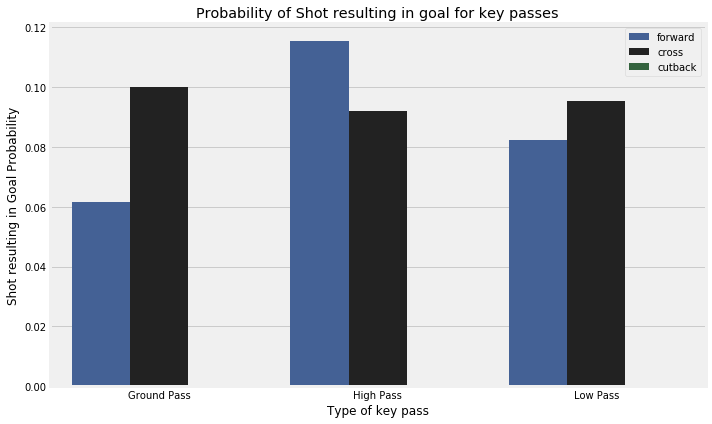

In [44]:
filt = df['cross_cutback_forward']=='none'
fig = plt.figure(figsize=(10,6))
sns.barplot(x='key_pass_type',y='isGoalBool',hue='cross_cutback_forward',ci=None,data=df[~filt], palette=sns.diverging_palette(255, 133, l=40, n=3, center="dark"))
plt.xlabel('Type of key pass')
plt.ylabel('Shot resulting in Goal Probability')
plt.title('Probability of Shot resulting in goal for key passes')
plt.legend(loc='upper right');
plt.tight_layout()
plt.savefig('forward_cross_cutback.png')

From the above plot we observe:
- Crosses are likely to create high xG shots followed by the passes in forward direction. However, high forward passes are seen to create higher xG shots. Infact, highest xG shots is created by the high forward passes.

- In general, high passes have higher xG irrespective of the direction of play.

- Cutbacks are not common in this dataset. There are only 6 cutbacks, out of which not even even 1 resultant shot was a goal.

Now let us see from where do the key passes originate:

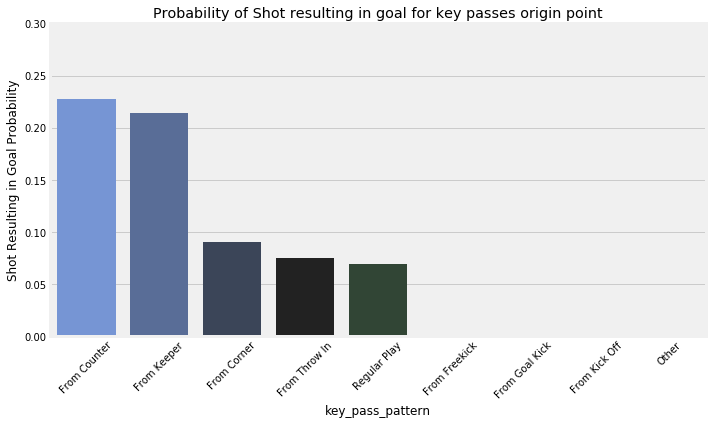

In [51]:
plt.figure(figsize=(10,6))
sns.barplot(x='key_pass_pattern',y='isGoalBool', order=['From Counter','From Keeper','From Corner', 'From Throw In', 'Regular Play', 'From Freekick', 'From Goal Kick', 'From Kick Off', 'Other'],ci=None,data=df[~filt], palette=sns.diverging_palette(255, 133, l=60, n=7, center="dark"))
plt.xticks(rotation=45)
plt.ylabel('Shot Resulting in Goal Probability');
plt.title('Probability of Shot resulting in goal for key passes origin point')
plt.ylim([0,0.3]);
plt.tight_layout()
plt.savefig('play_patterns.png')

From the above plot it is evident that the best key passes result from the Counter, Keeper, Corners, Throw-ins and Regular Play.

Corners and throw-ins are harder to directly score from but these can prove to be best types of key passes. So can be passes from the keeper and counters which can be observed above.

**First Time shots**

Utilizing the first_time feature of Statsbomb, let us analyze if a shot that is end result of a carry helps its chances of being a goal.
First_time shot is the shot that is taken first time without controlling it. First_time shot cannot be an end result of a shooter's carry.

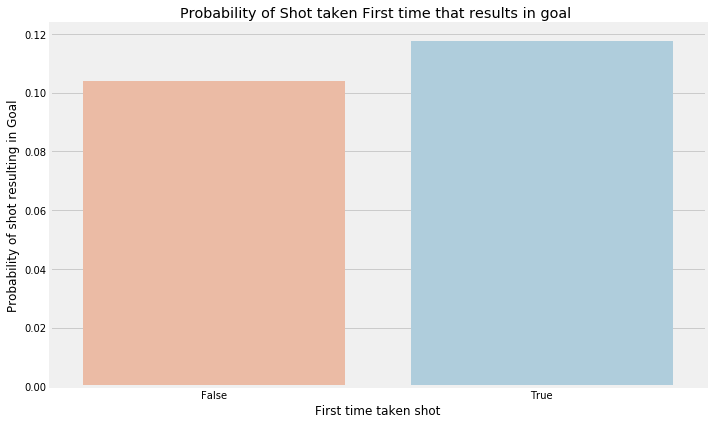

In [52]:
plt.figure(figsize=(10,6))
sns.barplot(x='first_time',y='isGoalBool',ci=None,data=df, palette = 'RdBu');
plt.xlabel('First time taken shot')
plt.ylabel('Probability of shot resulting in Goal')
plt.title('Probability of Shot taken First time that results in goal ')
plt.tight_layout()
plt.savefig('first_time.png')

We can see that the first time taken shots are more likely to be successful than shots that are controlled. We have seen before that distance of the shot is a very important feature in shot conversion. Let us confirm this for first time shots using a box-plot.

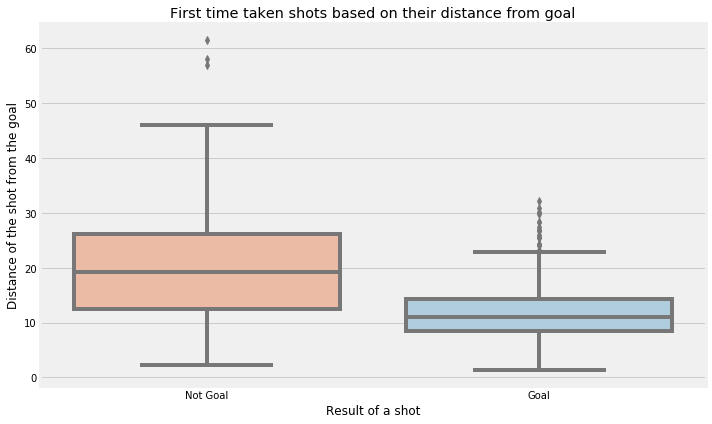

In [53]:
plt.figure(figsize=(10,6))
sns.boxplot(x='isGoal',y='shot_distance',data=df, palette = 'RdBu');
plt.xlabel('Result of a shot')
plt.ylabel('Distance of the shot from the goal')
plt.title('First time taken shots based on their distance from goal')
plt.tight_layout()
plt.savefig('shot_distance.png')

This confirms our observations. Most shots that are taken within 15 yards(inside the penalty box) result in goals. Shots that are unsuccessful are likely to be the first time shots taken away from the goal.  

**Shot Angle**

Next we look into the shot angle:

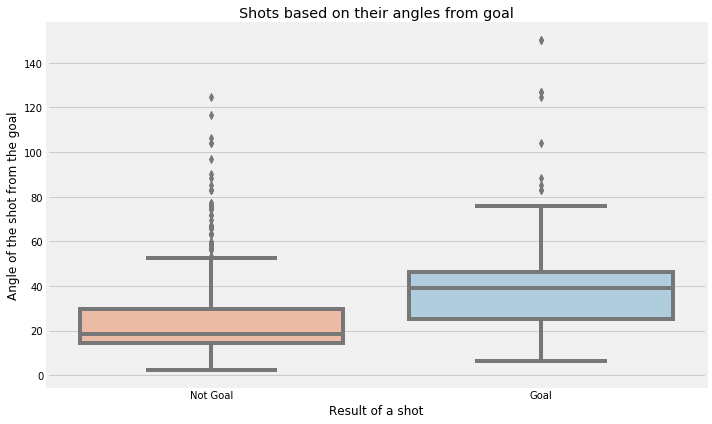

In [54]:
plt.figure(figsize=(10,6))
sns.boxplot(x='isGoal',y='shot_angle',data=df, palette = 'RdBu');
plt.xlabel('Result of a shot')
plt.ylabel('Angle of the shot from the goal')
plt.title('Shots based on their angles from goal')
plt.tight_layout()
plt.savefig('shot_angle.png')

Lower shot angle indicates that it is at a farther distance away from the goal. Since we have already proved that shots that are taken from longer distances are less likely to end up as goals. Shots with low angles result in fewer goals and the ones with greater shot angles are more likely to be goals.

Now, we look at type of shots in open play vs the shots in freekicks and penalties.

**Open play Shots vs Freekick and Penalty Shots**

In [55]:
open_play_pct = quant_pct(df,'type_name','Open Play')
freekick_pct = quant_pct(df,'type_name','Free Kick')
penalty_pct = quant_pct(df,'type_name','Penalty')

print('The percentage of shots from open play which are goals is {0}'.format(round(open_play_pct,2)*100))
print('The percentage of shots from freekicks which are goals is {0}'.format(round(freekick_pct,2)*100))
print('The percentage of shots from penalties which are goals is {0}'.format(round(penalty_pct,2)*100))

The percentage of shots from open play which are goals is 8.0
The percentage of shots from freekicks which are goals is 7.000000000000001
The percentage of shots from penalties which are goals is 72.0


- Penalties correspond to a very high probability of scoring, while freekicks correspond to a low probability of scoring. Open play shots are easier to score than freekicks. 

**Pack Density of opposition in front of the shot**

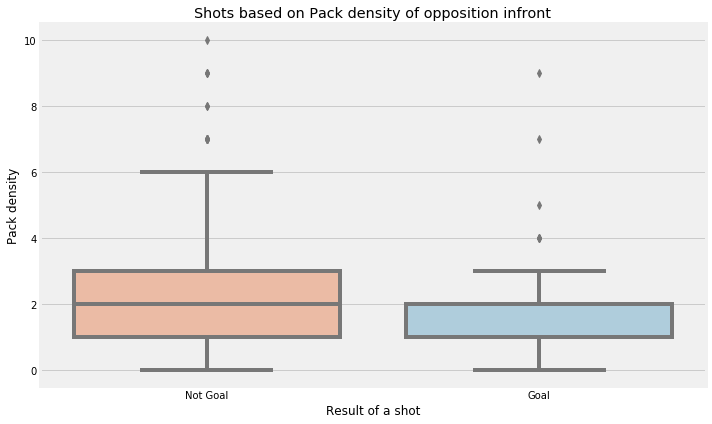

In [56]:
plt.figure(figsize=(10,6))
sns.boxplot(x='isGoal',y='pack_density',data=df, palette = 'RdBu');
plt.xlabel('Result of a shot')
plt.ylabel('Pack density')
plt.title('Shots based on Pack density of opposition infront')
plt.tight_layout()
plt.savefig('pack_density.png')

Shots taken when fewer players are directly in between shot and shot and goal. Unsuccessful shots generally have more players in between the shot and goal than successful shots.

Packing density, generally looks whether a goalkeeper is in the way of a shot. It is difficult to factor for how good the physical attributes of keeper like jumping, diving, height etc.  For this project, we adopt a simplistic approach where the packing density is the only metric which considers positioning of the other players wrt shot.


**Type of non play factors**
- **Minute of the shot**

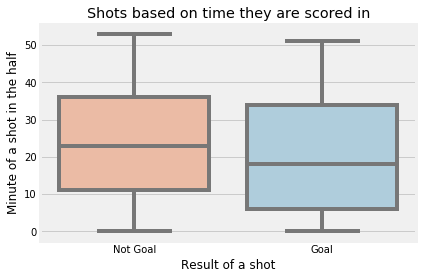

In [58]:
df['minute_of_shot_in_half']=df['timestamp'].dt.minute
sns.boxplot(x='isGoal',y='minute_of_shot_in_half',data=df, palette = 'RdBu')
plt.xlabel('Result of a shot')
plt.ylabel('Minute of a shot in the half')
plt.title('Shots based on Actual time they are taken in');

We can see that the actual time of shot is not a important feature to predict whether a shot is successful or not.

- **Home team or Away Team**

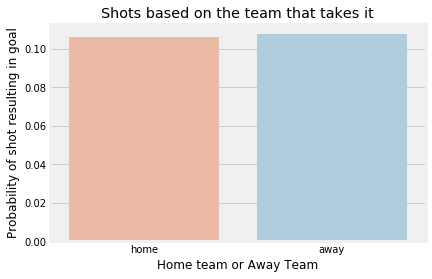

In [59]:
sns.barplot(x='home_or_away',y='isGoalBool',ci=None,data=df, palette = 'RdBu');
plt.xlabel('Home team or Away Team')
plt.ylabel('Probability of shot resulting in goal')
plt.title('Shots based on the team that takes it');

Again this is insignificant feature and the team that the player is playing for does not affect the shot conversion rate. This can be proved from the above plot.